In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
from automlp import parameters as explore
reload(explore)

<module 'automlp.parameters' from 'automlp/parameters.pyc'>

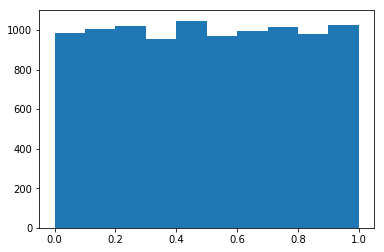

In [3]:
reload(explore)
p = explore.UniformParameter("uniform", 0, 1)
hist([p.pick() for _ in range(10000)]);

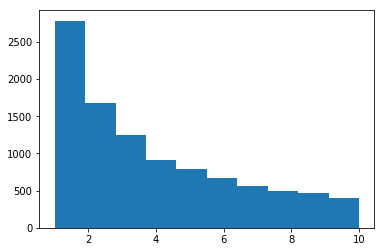

In [4]:
reload(explore)
p = explore.LogParameter("log", 1, 10)
hist([p.pick() for _ in range(10000)]);

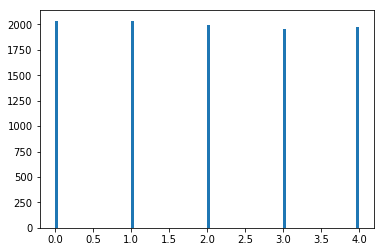

In [5]:
reload(explore)
p = explore.QuantizedParameter("q", 0, 5)
hist([p.pick() for _ in range(10000)], bins=100);

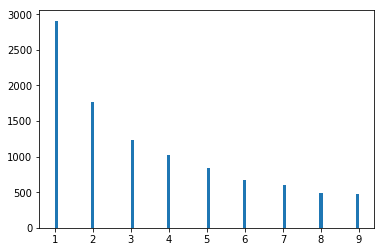

In [6]:
reload(explore)
p = explore.QuantizedLogParameter("ql", 1, 10)
hist([p.pick() for _ in range(10000)], bins=100);

In [7]:
reload(explore)
ps = explore.ParameterSet()
ps += explore.UniformParameter("u", 0, 1)
ps += explore.LogParameter("l", 1e-3, 1e1)
ps += explore.QuantizedParameter("q", 1, 10)
print(ps.parameters.items())
print(ps.pick())
print(ps.pick().values())
v = ps.pick()
print(v)
nv = ps.nn_vector(v)
print(nv)

[('u', <automlp.parameters.UniformParameter object at 0x7fa2927f1d10>), ('l', <automlp.parameters.LogParameter object at 0x7fa2927b0b50>), ('q', <automlp.parameters.QuantizedParameter object at 0x7fa2926e90d0>)]
OrderedDict([('u', 0.8303717653583519), ('l', 0.9061638223730957), ('q', 4)])
[0.5328018523271172, 0.015458915264927476, 8]
OrderedDict([('u', 0.24908005314559523), ('l', 2.897426138360271), ('q', 9)])
[ 4.98160106 17.31006187 17.77777778]


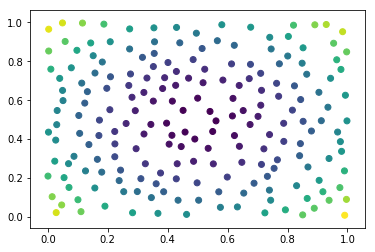

In [8]:
reload(explore)
ps = explore.ParameterSet()
ps += explore.UniformParameter("a", 0, 1)
ps += explore.UniformParameter("b", 0, 1)
ex = explore.Exploration(ps)
for i in range(200):
    pv = ex.pick_farthest()
    v = np.array(pv.values())
    c = sum((v-np.array([0.5,0.5]))**2)
    ex.add_result(pv, c)
s = array([np.array(r[1].values()) for r in ex.results])
scatter(s[:,0], s[:,1], c=[r[0] for r in ex.results])

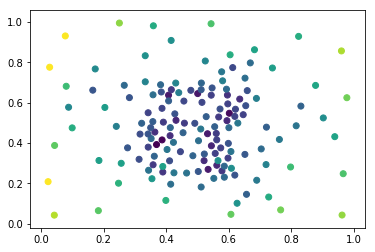

In [9]:
reload(explore)
ps = explore.ParameterSet()
ps += explore.UniformParameter("a", 0, 1)
ps += explore.UniformParameter("b", 0, 1)
ex = explore.Exploration(ps)
for i in range(150):
    pv = ex.pick()
    v = np.array(pv.values())
    c = sum((v-np.array([0.5,0.5]))**2) + 0.05 * randn()
    ex.add_result(pv, c)
s = array([np.array(r[1].values()) for r in ex.results])
scatter(s[:,0], s[:,1], c=[r[0] for r in ex.results])

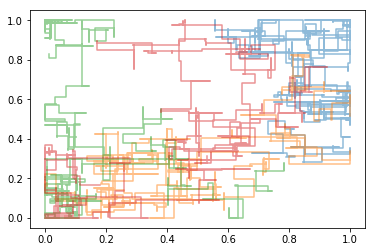

In [10]:
reload(explore)
ps = explore.ParameterSet()
ps += explore.UniformParameter("a", 0, 1)
ps += explore.UniformParameter("b", 0, 1)
for _ in range(4):
    result = [ps.pick()]
    for i in range(500):
        #print(result)
        result.append(ps.mutate(result[-1]))
    plot([r["a"] for r in result], [r["b"] for r in result], alpha=0.5)